# Стохастический градиенный спуск
Зачастую на практике встречаются задачи минимизации вида
$$
f(x)=\mathbb{E}_\xi F(x, \xi)\rightarrow \min
$$
В этом котексте $f$ принято называть <i>функционалом среднего риска</i>. Проблема с такими функционалами заключается в том, что обычно нет возможности измерить функцию $f$, но можно измерить $F$ со случайно выбранным параметром $\xi$, аналогично ситуация обстоит и с градиентом. Оказывается, что градиентный спуск можно модифицировать так, чтобы решать эту задачу: достаточно использовать не $\nabla f(x)$, а $\nabla_xF(x, \xi)$:
$$
x_{k+1}=x_k-\alpha_k\nabla_x F(x_k, \xi_k).
\tag{1}
$$
Здесь подразумевается, что $\xi_k$ - одинаково распределенные независимые случайные величины. Саму процедуру принято называть <i>стохастическим градиентным спуском</i>. В отличие от обычного градиентного спуска здесь уже не получится брать постоянный размер шага для того, чтобы гарантировать сходимость. Показательным здесь является довольно простой пример:
$$
F(x,\xi)=\|x-\xi\|^2.
$$
Отметим, что
$$
\nabla f(x)=\nabla\mathbb{E}_\xi F(x, \xi)=\mathbb{E}_\xi \nabla_x F(x, \xi)
$$
Приравнивая градиент к нулю получаем, что $F$ минимизиурется в точке $\mathbb{E}\xi$. Таким образом задача минимизации $F$ эквивалентна нахождению математического ожидания случайной величины. Из центральной предельной теоремы
$$
\frac{\sum_{i=1}^n(\xi_i-\mathbb{E}\xi)}{\sqrt{n}}\rightarrow \mathcal{N}(0, Var(\xi)),
$$
из чего следует, что 
$$
\frac{\sum_{i=1}^n\xi_i}{n}-\mathbb{E}(\xi)\sim \mathcal{O}\left(\frac{Var(\xi)}{\sqrt{n}}\right).
$$
Как оказывается, эту оценку ускорить не получается, что накладывает и ограничения на стохастический градиентный спуск. Так или иначе стоит иметь в виду, что скорость сходимости в стохастическом градиентном спуске складывается из двух составлвяющих: стохастической и оптимизационной. Стохастическая часть имеет заметно более плохую оценку нежели оптимизационная, однако, как мы увидим позже, оказывается, что может быть выгодно использовать стохастический градиентный спуск вместо обычного.

<b>Лемма</b>. Если при $\beta>1$ для числовой последовательности $\alpha_k$ выполняется $\alpha_k\geq 0$ и 
$$
\alpha_{k+1}\leq \alpha_k\left(1-\frac{\beta}{k+1}\right)+\frac{\gamma}{(k+1)^2},
$$
то при $D=\max\left\{\frac{\gamma}{\beta - 1}, \alpha_0\right\}$ выполняется
$$
\alpha_k\leq \frac{D}{k+1}.
$$
<b>Доказательство</b>. Докажем по индукции: очевидным образом база верна. Предположим, что утверждение верно для $k$, выведем верность для $k+1$:
$$
\begin{array}{rl}
\alpha_{k+1}&\leq \alpha_k\left(1-\frac{\beta}{k+1}\right)+\frac{\gamma}{(k+1)^2}\leq \frac{D}{k+1}\left(1-\frac{\beta}{k+1}\right)+\frac{\gamma}{(k+1)^2}\\
&=\frac{D(k+1-\beta)(k+2)+\gamma(k+2)}{(k+1)^2(k+2)}\\
&=\underbrace{\frac{-D+(k+2)(D(1-\beta)+\gamma)}{(k+1)^2(k+2)}}_{<0}+\frac{D}{k+2}\leq \frac{D}{k+2}.~\#
\end{array}
$$

<b>Теорема (о сходимости SGD)</b>. Пусть $f$ сильно выпукла с константой $m$, $\alpha_k=\frac{\beta}{k+1}$, $\beta>\frac{1}{2m}$, $\xi_k$ не зависят от $\xi_i,~i<k, x_k$, 
$\|\nabla_x F(x, \xi)\|\leq M$, тогда последовательность (1) сходится в среднеквадратичном смысле, и при этом выполняется оценка
$$
\mathbb{E}\|x_k-x^*\|^2\leq \max\left\{\frac{\beta^2M^2}{2\beta m-1}, \|x_0-x^*\|^2\right\}\frac{1}{k+1}
$$
<b>Доказательство</b>. 
$$
\begin{array}{rl}
\mathbb{E}\{\|x_{k+1}-x^*\|^2~|~x_k\}&=\|x_k-x^*\|^2-2\alpha_k\mathbb{E}_{\xi_k}\{\nabla_x F(x_k, \xi_k)\}^T(x_k-x^*)+\alpha_k^2\mathbb{E}_{\xi_k}\|\nabla_x F(x_k, \xi_k)\|^2\\
&=\|x_k-x^*\|^2-2\frac{\beta}{k+1}\nabla f(x_k)^T(x_k-x^*)+\frac{\mathbb{E}\{\|\nabla_x F(x_k, \xi_k)\|^2\}\beta^2}{(k+1)^2}\\
&\leq \left(1-\frac{2m\beta}{k+1}\right)\|x_k-x^*\|^2+\frac{M^2\beta^2}{(k+1)^2}
\end{array}
$$
Применяя доказанную лемму получаем утверждение теоремы. \#

Без сильной выпуклости сходимость получается еще медленней.


<b>Теорема</b>. Пусть $f$ - $M$-липшицева функция выпуклая функция, $x^*$ - точка минимума $f$, $\|\nabla_x F(x, \xi)\|^2\leq \sigma^2$, тогда при $\alpha_k=\alpha\leq 1/M$ последовательноть (1) удовлетворяет
$$
\mathbb{E}f(\overline{x_k})-f(x^*)\leq \frac{\|x_0-x^*\|^2}{2tk}+\frac{t\sigma^2}{2}
$$
где $\overline{x_k}=(1/k)(x_1+\ldots+x_k)$.

<b>Доказательство</b>. 
$$
\begin{array}{rl}
f(x_{i+1})&\leq f(x_i)+\nabla f(x_i)^T(x_{i+1}-x_i)+\frac{M}{2}\|x_{i+1}-x_i\|^2 \\
&\leq f(x_i)-\alpha\nabla f(x_i)^T\nabla F(x_i,\xi_i)+\frac{M\alpha^2}{2}\|\nabla F(x_i, \xi_i)\|^2
\end{array}
$$
Перейдем к мат. ожиданию по $\xi_i$:
$$
\begin{array}{rl}
\mathbb{E}_{\xi_i}f(x_{i+1})&\leq f(x_i)-\alpha\|\nabla f(x_i)\|^2+\frac{M\alpha^2}{2}(\|\nabla f(x_i)\|^2+\sigma^2)\\
&\leq f(x_i)-\frac{\alpha}{2}\|\nabla f(x_i)\|^2+\frac{\alpha \sigma^2}{2}
\end{array}
$$
Теперь проделаем трюк, схожий с тем, что мы делали в анализе обычного градиентного спуска
$$
\begin{array}{rl}
\mathbb{E}_{\xi_i}f(x_{i+1})&\leq f(x_i)-\frac{\alpha}{2}\|\nabla f(x_i)\|^2+\frac{\alpha \sigma^2}{2} \\
&\leq f(x^*)+\nabla f(x_i)^T(x_i-x^*)-\frac{\alpha}{2}\|\nabla f(x_i)\|^2+\frac{\alpha \sigma^2}{2} \\
&\leq f(x^*)+ \mathbb{E}\nabla F(x_i, \xi_i)^T(x_i-x^*)-\frac{\alpha}{2}\mathbb{E}\|\nabla F(x_i, \xi_i)\|^2+\alpha \sigma^2\\
&=f(x^*)+\mathbb{E}\left[\nabla F(x_i, \xi_i)^T(x_i-x^*)-\frac{\alpha}{2}\|\nabla F(x_i, \xi_i)\|^2\right]+\alpha \sigma^2\\
&=f(x^*)+\frac{1}{2\alpha}\mathbb{E}\left[\|x_i-x^*\|^2-\|x_i-x^*-\alpha\nabla F(x_i, \xi_i)\|^2\right]+\alpha\sigma^2\\
&=f(x^*)+\frac{1}{2\alpha}\mathbb{E}\left[\|x_i-x^*\|^2-\|x_{i+1}-x^*\|^2\right]+\alpha\sigma^2
\end{array}
$$
Здесь, в отличие от обычного градиентного спуска мы не можем воспользоваться монотонностью $f(x_k)$, специально ради этого оценка дается на среднее $x_k$: в силу неравенства Йенсена:
$$
kf(\overline{x_k})\leq \sum_{i=1}^kf(x_i)
$$
Наконец суммируя ранее выведенные неравенсва и переходя к мат. ожиданию получаем
$$
\begin{array}{rl}
\mathbb{E}f(\overline{x_k})-f(x^*)&\leq \frac{1}{k}\sum_{i=1}^{k}[\mathbb{E}f(x_i)-f(x^*)]\\
&\leq \frac{\|x_0-x^*\|^2}{2\alpha k} + \alpha\sigma^2~\#
\end{array}
$$

При $\alpha=\mathcal{O}(1/\sqrt{k})$ получаем сходимость порядка $\mathcal{O}(1/\sqrt{k})$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

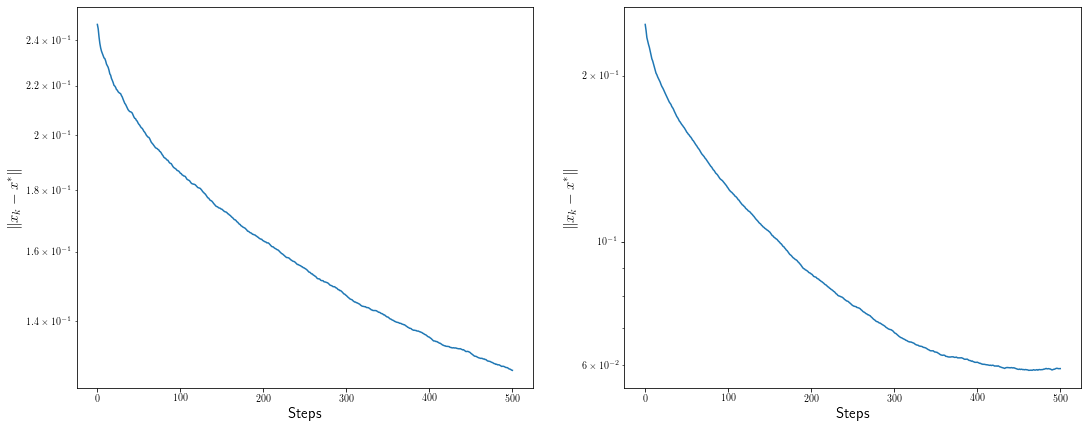

In [6]:
def show_sgd():
    f = lambda x: x[0] ** 4 + 2 * x[1] ** 4
    sgrad_f = lambda x: np.array([4 * x[0] ** 3, 8 * x[1] ** 3]) + np.random.rand(2)
    x = np.array([0.3, 1.2]) * 0.2
    num_iters = 500
    alpha = 0.005
    dists = [np.linalg.norm(np.array(x))]
    for i in range(num_iters):
        dx = sgrad_f(x)
        x = x - alpha / ((i + 1) ** 0.5) * dx
        dists.append(np.linalg.norm(x))
        
    fig, axs = plt.subplots(1, 2, figsize=(18, 7))
    
    axs[0].set_yscale('log')
    axs[0].set_xlabel('Steps', fontsize=15)
    axs[0].set_ylabel('$\|x_k-x^*\|$', fontsize=15)
    axs[0].plot([i for i in range(num_iters + 1)], [dists[i] for i in range(num_iters + 1)])

    f = lambda x: x[0] ** 2 + 2 * x[1] ** 2
    sgrad_f = lambda x: np.array([2 * x[0], 4 * x[1]]) + np.random.rand(2)
    x = np.array([0.3, 1.2]) * 0.2
    alpha = 0.005
    dists = [np.linalg.norm(np.array(x))]
    for i in range(num_iters):
        dx = sgrad_f(x)
        x = x - alpha / ((i + 1) ** 0.5) * dx
        dists.append(np.linalg.norm(x))
        
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Steps', fontsize=15)
    axs[1].set_ylabel('$\|x_k-x^*\|$', fontsize=15)
    axs[1].plot([i for i in range(num_iters + 1)], [dists[i] for i in range(num_iters + 1)])

    
    plt.close(fig)
    return fig

show_sgd()

В отдельных случаях стохастический градиентный спуск имеет сложность, аналогичную обычному градиентному спуску, например если предположить следующую ограниченность второго момента
$$
\mathbb{E}\|\nabla F(x, \xi)\|^2\leq C\|\mathbb{E}F(x, \xi)\|^2,\tag{2}
$$
то удается избавиться от слагаемого, соответствующему дисперсии, после чего мы можем получить те же оценки, что и в градиентном спуске, в которых появляется слагаемое вместо $M$ образуется $CM$.

## Стохастический градиентный спуск в задачах МО
На практике распространенным случаем является изначальная выборка $\xi_i, \ldots, \xi_m$, из по которым мы можем измерять $F(x, \xi_i)$ для любых $x$, что дает нам эмпирическое приближение функионала среднего риска
$$
f(x)\sim \hat{f}(x)=\frac{1}{m}\sum_{i=1}^mF(x, \xi_i).
$$
$\hat{f}$ может быть минимизирована с помощью обычного градиентного спуска, что потребует вычисления $\nabla F(x,\cdot)$ в $m$ точках на каждой итерации. Альтернативно можно минимизировать $\hat{f}$ с помощью стохатсического градиентного спуска с
$$
\hat{F}(x, i)=F(x, \xi_i)
$$
при $i$ равномерно распределенным индексом на $\{1, \ldots, m\}$. Неформально это тоже самое, что и минимизация $f$ стохастическим градиентным спуском. Несмотря на то, что градиентный спуск сходится быстрее стохастического градиентного спуска, за счет того, что сложность итерации в $m$ раз меньше можно получить существенный прирост в скорости сходимости. Наиболее распространенный вариант на практике - это <i>пакетный градиентный спуск</i> (batched gradient descent), который является вариацией стохастического градиентного спуска, у которого
$$
\hat{F}(x, \xi_k)=\frac{1}{|S_k|}\sum_{i\in S_k}F(x, \xi_i).
$$
Иначе говоря, вместо одного сэмпла мы используем среднее из нескольких сэмплов. В своих крайних случаях ($|S_k|=1$ и $|S_k|=m$) пакетный градиентный спуск вырождается в стохастический градиентный спуск и обычный градиентный спуск соответственно. Использование выборки размера больше единицы позволяет балансировать между дисперсией в стохастическом градиентном спуске с одной стороны, и количеству итераций за одно и тоже количество вычислений градиента целевой функции с другой. В добавок с возможностями распараллеливания вычисления среднего градиента по выборке пакетный градиентный спуск является наиболее универсальным и эффективным на практике.

# Пример: Randomized Kaczmarz algorithm
Рассмотрим довольно интересный метод решения систем линейных уравнений. Для системы
$$
Ax=b
$$
c $A\in\mathbb{R}^{m\times n}$ алгоритм заключается в следующем:

для $k=1, \ldots$
* Сгенерировать случайно $i\in\{1,\ldots, m\}$.
* Обновить приближение, спроецировав его на гиперплоскость, задающуюся $i$-ым уравнением
$$
x_{k+1}=x_k+\frac{b_i-A_ix_k}{A_iA_i^T}A_i^T.
$$
Рассмотрим функцию
$$
f(x)=\frac{1}{2m}\|Ax-b\|^2=\frac{1}{2m}(x^TA^TAx-2(A^Tb)^Tx+\|b\|^2)
$$
Минимум которой соответствует решению системы
$$
\nabla f(x)=\frac{1}{m}(A^TAx-A^Tb)=0
$$
что эквивалентно решению исходной системы, если решение $Ax=b$ существует. Теперь давайте рассмотрим
$$
F(x, i)=\frac{1}{2}\|A_ix-b_i\|^2
$$
и заметим, что равномерном распределении $i$
$$
\mathbb{E}_i\nabla_x F(x, i)=\frac{1}{m}\sum_{i=1}^m(A_i^TA_ix-A_i^Tb_i)=\nabla f(x)
$$
Обратите внимание, что так как мы обозначаем за $A_i$ строчку матрицы $A$, то $A_i^TA_i$ - это произведение столбца на строку, т. ё. внешнее произведение, результат которого матрица. В силу указанного выше можно заключить, что Kaczmarz метод является частным случаям стохастического градиентного спуска. Более того, для него выполняется свойство (2), заметим, что
$$
\begin{array}{rl}
\mathbb{E}\{\|x_{k+1}-x^*\|^2~|~x_k\}&=\mathbb{E}(x_k-x^*)^T\left(I-\frac{b_i-A_ix_k}{A_iA_i^T}\right)^T\left(I-\frac{b_i-A_ix_k}{A_iA_i^T}\right)(x_k-x^*)\\
&=(x_k-x^*)^T\mathbb{E}\left[\left(I-\frac{b_i-A_ix_k}{A_iA_i^T}\right)^T\underbrace{\left(I-\frac{b_i-A_ix_k}{A_iA_i^T}\right)}_{B_i}\right](x_k-x^*)\\
&\leq \|\mathbb{E}[B_i^TB_i]\|\|x_k-x^*\|^2
\end{array}
$$
Таким образом мы получаем линейную сходимость. Одна из традиционных рандомизированных версий этого метода предлагает выбирать строчку $i$ c вероятностью пропорциональной $\|a_i\|^2$, что дает
$$
\mathbb{E}B_i=I-\frac{A}{\|A\|_F}
$$
$$
\mathbb{E}B_i^TB_i\approx \left(I-\frac{A}{\|A\|_F}\right)^T\left(I-\frac{A}{\|A\|_F}\right)
$$
Что дает итоговую сходимость
$$
\mathbb{E}\|x_k-x^*\|^2\leq (1-\kappa(A)^{-2})\|x_0-x^*\|^2
$$
где $\kappa(A)=\|A\|_F\|A^{-1}\|_2$ - масштабированное число обусловленности матрицы $A$. В целом сходимость метода линейная и аналогична сходимости градиентного спуска в сильно выпуклом случае, но при этом
* одна итерация это алгоритма гораздо менее затратная, чем одна итерация градиентного спуска или же метода сопряженных градиентов. Более того, в среднем на одну итерацию градиентного спуска приходится примерно $m$ итераций этого метода. 
* алгоритм довольно чувствителен к плохо обусловленным матрицам

In [7]:
def project_hyperplane(a, b, y):
    #print(a.shape, y.shape)
    l = (a @ y - b) / (a.T @ a)
    return y - a * l

In [8]:
import random

def kaczmarz(A, b, x_0, iters):
    result = [x_0.copy()]
    x = x_0
    beta = 0.9
    alpha = 1
    for t in range(iters):
        for _ in range(A.shape[0]):
            i = random.randint(0, A.shape[0] - 1)
            #print(i)
            x = x + alpha * (project_hyperplane(A[i,:], b[i], x) - x)
            #x = (1 if alpha is None else alpha ** t) * (b[i] - np.dot(A[i], x)) / (np.dot(A[i], A[i])) * A[i]
        result.append(x.copy())
        
    return result

In [22]:
import scipy as sp
import scipy.linalg

def heavy_ball_descent(x_0: np.ndarray,
                       A: np.ndarray,
                       b: np.ndarray,
                       m: float,
                       M: float,
                       iters: int):
    alpha = 4 / (m ** 0.5 + M ** 0.5) ** 2
    beta = ((M ** 0.5 - m ** 0.5) / (M ** 0.5 + m ** 0.5)) ** 2
    result = [x_0]
    cur_x = x_0
    prev_x = x_0
    for i in range(iters):
        t = cur_x
        cur_x = cur_x - alpha * (A @ cur_x - b) + beta * (cur_x - prev_x)
        prev_x = t
        result.append(cur_x.copy())
    return result

def gradient_descent(x_0: np.ndarray,
                       A: np.ndarray,
                       b: np.ndarray,
                       m: float,
                       M: float,
                       iters: int):
    alpha = 2 / (m + M)
    result = [x_0]
    cur_x = x_0
    for i in range(iters):
        cur_x = cur_x - alpha * (A @ cur_x - b)
        result.append(cur_x.copy())
    return result

# You can variate gamma for easy conditioning:
# the lower the gamma is the higher condition of A will be
def show_kaczmarz_and_gd(gamma=0.1, dim=500):
    A = np.random.rand(dim, dim)
    A = (1 / dim) *  A @ A.T
    A = A + gamma * np.diag(np.sum(np.abs(A), axis=-1))
    
    sD = sp.linalg.sqrtm(np.linalg.inv(np.diag(np.diag(A))))
    A = sD.T @ A @ sD
    b = np.random.rand(dim)
    fig, axs = plt.subplots(1, 1, figsize=(10, 7))
    eig, v = np.linalg.eigh(A)
    m, M = eig[0], eig[-1]
    print(m, M)
    print('Condition(A):', M / m)
    x = np.zeros_like(b)
    A_inv = np.linalg.inv(A)
    
    
    iters = dim
    
    estimates_gradient = gradient_descent(x, A, b, m, M, iters)
    estimates_hb = heavy_ball_descent(x, A, b, m, M, iters)
    estimates_kaczmarz = kaczmarz(A, b, x, iters)
    
    axs.plot([i for i in range(len(estimates_gradient))], [np.linalg.norm(A @ x - b) for x in estimates_gradient], label='GD')
    axs.plot([i for i in range(len(estimates_kaczmarz))], [np.linalg.norm(A @ x - b) for x in estimates_kaczmarz], label='Kaczmarz')
    axs.plot([i for i in range(len(estimates_hb))], [np.linalg.norm(A @ x - b) for x in estimates_hb], label='Heavy ball')
    
    axs.legend()
    axs.set_ylabel(r'$\|Ax_k-b\|$', fontsize=20)
    axs.set_xlabel(r'$k$', fontsize=20)
    axs.set_yscale('log')
    plt.close(fig)
    return fig

0.7876819427417852 79.76797352425389
Condition(A): 101.26926770289454


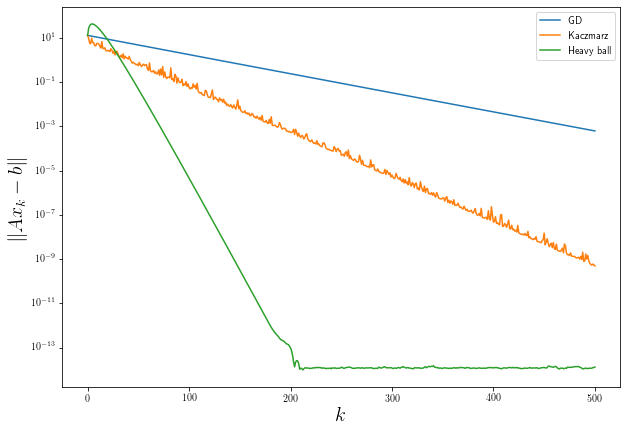

In [23]:
show_kaczmarz_and_gd(0.01, 500)